<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Answer-1" data-toc-modified-id="Answer-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Answer 1</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Answer-2" data-toc-modified-id="Answer-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Answer 2</a></span></li></ul></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span><ul class="toc-item"><li><span><a href="#Answer-3" data-toc-modified-id="Answer-3-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Answer 3</a></span></li></ul></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4</a></span><ul class="toc-item"><li><span><a href="#Answer-4" data-toc-modified-id="Answer-4-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Answer 4</a></span></li></ul></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 5</a></span><ul class="toc-item"><li><span><a href="#Answer-5" data-toc-modified-id="Answer-5-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Answer 5</a></span></li></ul></li><li><span><a href="#Question-6" data-toc-modified-id="Question-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Question 6</a></span><ul class="toc-item"><li><span><a href="#Answer-6" data-toc-modified-id="Answer-6-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Answer 6</a></span></li></ul></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


## Question 1

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


In [4]:
data[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].dtypes

TOTAL_REVENUE        float64
TOTAL_EXPENDITURE    float64
dtype: object

In [5]:
data[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().sum(
)/data[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().count()

TOTAL_REVENUE        0.142091
TOTAL_EXPENDITURE    0.142091
dtype: float64

We notice that there are some null values that we need to address first. Since 14% of the data is a fairly substantial amount, we shall fill them up with the respective medians.

In [6]:
data2 = data.copy()

data2['TOTAL_REVENUE'] = data2['TOTAL_REVENUE'].fillna(np.nanmedian(data2['TOTAL_REVENUE']))
data2['TOTAL_EXPENDITURE'] = data2['TOTAL_EXPENDITURE'].fillna(np.nanmedian(data2['TOTAL_EXPENDITURE']))

data2[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().sum(
)/data2[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().count()

TOTAL_REVENUE        0.0
TOTAL_EXPENDITURE    0.0
dtype: float64

The null values are filled up.

In [7]:
data2[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1.492000e+03,1.492000e+03
mean,8.521936e+06,8.633691e+06
std,1.096808e+07,1.117990e+07
min,4.656500e+05,4.816650e+05
25%,2.546261e+06,2.523968e+06
50%,5.079546e+06,5.234506e+06
75%,9.276958e+06,9.434922e+06
max,8.921726e+07,8.532013e+07


{'whiskers': [<matplotlib.lines.Line2D at 0x11aa6ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x11aa7f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x11aa6e150>],
 'medians': [<matplotlib.lines.Line2D at 0x11aa6ef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x11aa89890>],
 'means': []}

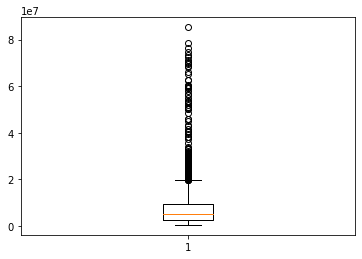

In [8]:
plt.boxplot(data2['TOTAL_EXPENDITURE'])

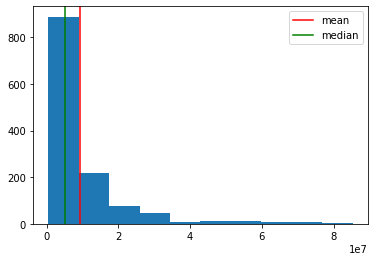

In [9]:
plt.hist(data['TOTAL_EXPENDITURE'])
plt.axvline(x = np.nanmean(data['TOTAL_EXPENDITURE']), c = 'red', label = "mean")
plt.axvline(x = np.nanmedian(data['TOTAL_EXPENDITURE']), c = 'green', label = "median")
plt.legend()
plt.show()

### Answer 1

Both the boxplot and the histogram confirm that the data contains outliers. We'll use Tukey's method to quantify the number of outliers at each level.

## Question 2

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

### Answer 2

In [10]:
def tukeys_visualizers(dataframe, list_of_cols):
    
    for col in list_of_cols:
        #print("Calculating outliers for:", col)
        q75, q25 = np.percentile(dataframe[col], [75, 25])
        iqr = q75 - q25

        outliers = []
        thresholds = []

        for threshold in np.arange(1, 15, 0.5):
            min_val = q25 - (iqr*threshold)
            max_val = q75 + (iqr*threshold)

            outlier_count = len((np.where((dataframe[col] > max_val) | (dataframe[col] < min_val))[0]))

            #print("The score threshold is: {}".format(threshold))
            #print("Number of outliers is: {}".format(outlier_count))

            outliers.append(outlier_count)
            thresholds.append(threshold)

        visuals = pd.Series(outliers, thresholds)
        visuals.plot(label = col)

    plt.legend()
    plt.xlabel('IQR Threshold')
    plt.ylabel('Number of outliers')
    plt.xticks(ticks = range(1, 15))
    plt.show()

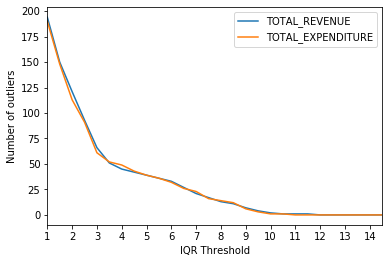

In [11]:
tukeys_visualizers(data2, list_of_cols = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])

We notice that there's a sharp decline in the number of outliers at a threshold of 3, so we'll drop the values outside that threshold and see how the data changes. 

In [12]:
data2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,5079546.0,NaN,NaN,NaN,5234505.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,5079546.0,NaN,NaN,NaN,5234505.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,5079546.0,NaN,NaN,NaN,5234505.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,5079546.0,NaN,NaN,NaN,5234505.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


In [13]:
for col in ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']:
    q75, q25 = np.percentile(data2[col], [75, 25])
    iqr = q75 - q25
    threshold = 3
    
    cutoff = threshold * iqr
    
    data2 = data2.loc[data2[col] < cutoff]
    
    print(cutoff)

20192091.75
15664978.5


And compare the boxplot...

{'whiskers': [<matplotlib.lines.Line2D at 0x11b613190>,
 'caps': [<matplotlib.lines.Line2D at 0x11b613c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b592510>],
 'medians': [<matplotlib.lines.Line2D at 0x11b61a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b61abd0>],
 'means': []}

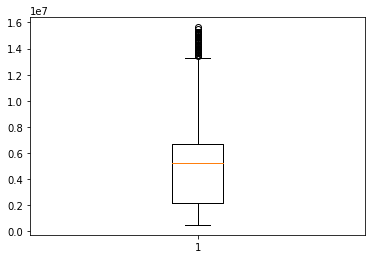

In [14]:
plt.boxplot(data2['TOTAL_EXPENDITURE'])

...and windsorize everything at the 95% percentile. 

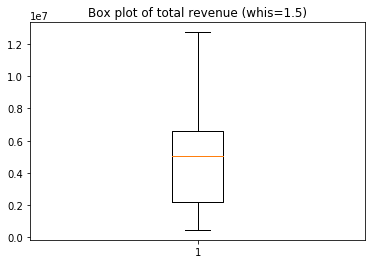

In [15]:
from scipy.stats.mstats import winsorize

data2['TOTAL_EXPENDITURE'] = winsorize(data2['TOTAL_EXPENDITURE'], (0, 0.05))
data2['TOTAL_REVENUE'] = winsorize(data2['TOTAL_REVENUE'], (0, 0.05))

plt.boxplot(data2['TOTAL_REVENUE'])
plt.title("Box plot of total revenue (whis=1.5)")
plt.show()

(array([233., 181., 127., 315.,  98.,  72.,  68.,  53.,  43., 101.]),
 array([  481665. ,  1680420.1,  2879175.2,  4077930.3,  5276685.4,
         6475440.5,  7674195.6,  8872950.7, 10071705.8, 11270460.9,
        12469216. ]),
 <a list of 10 Patch objects>)

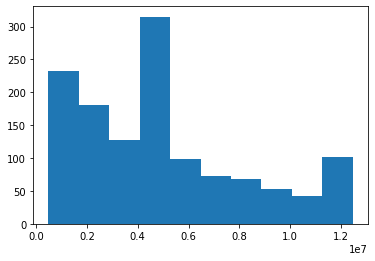

In [16]:
plt.hist(data2['TOTAL_EXPENDITURE'])

## Question 3

Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [17]:
data['BUDGET_DEFICIT'] = data['TOTAL_REVENUE'] - data['TOTAL_EXPENDITURE']

data3 = data.copy()

data3['BUDGET_DEFICIT'] = data3['BUDGET_DEFICIT'].fillna(np.nanmedian(data3['BUDGET_DEFICIT']))

data3['BUDGET_DEFICIT'].isnull().sum()

0

### Answer 3

We notice that there are a great deal of negative outliers, which intuitively follows from the fact that states can often have budget deficits for certain years. 

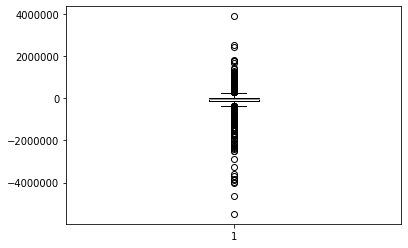

In [18]:
plt.boxplot(data3['BUDGET_DEFICIT'])
plt.show()

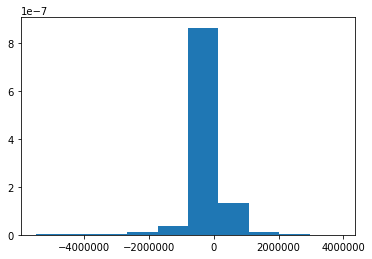

In [19]:
plt.hist(data3['BUDGET_DEFICIT'], density=True)
plt.show()

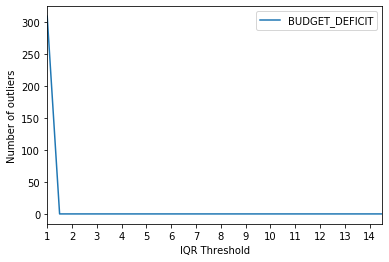

In [34]:


tukeys_visualizers(data3, ['BUDGET_DEFICIT'])



We drop the datapoints outside the `threshold` = 3 cutoff, and windsorise the rest at the (5, 95) percentile. 

In [21]:
q75, q25 = np.percentile(data3['BUDGET_DEFICIT'], [75, 25])
iqr = q75 - q25
threshold = 3

cutoff = threshold * iqr

min_cutoff = np.median(data3['BUDGET_DEFICIT']) - cutoff
max_cutoff = np.median(data3['BUDGET_DEFICIT']) + cutoff

print(np.median(data3['BUDGET_DEFICIT']), cutoff, min_cutoff, max_cutoff)

-21484.0 496983.75 -518467.75 475499.75


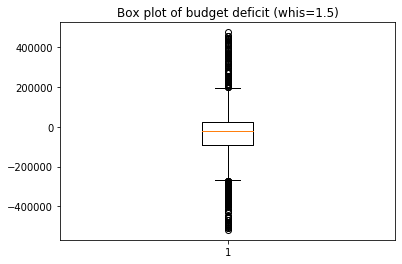

In [22]:
data3 = data3.loc[data3['BUDGET_DEFICIT'] < max_cutoff]
data3 = data3.loc[data3['BUDGET_DEFICIT'] > min_cutoff]

plt.boxplot(data3['BUDGET_DEFICIT'])
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

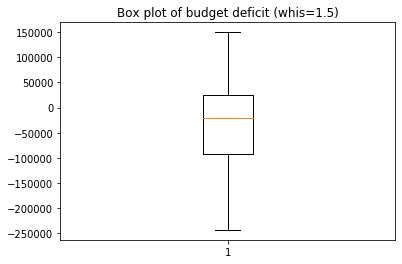

In [23]:
winsorize(data3['BUDGET_DEFICIT'], (0, 0.1), inplace= True)
winsorize(data3['BUDGET_DEFICIT'], (0.1, 0), inplace=True)

plt.boxplot(data3['BUDGET_DEFICIT'])
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

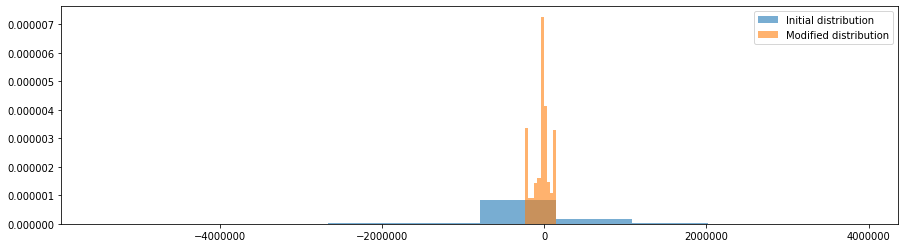

In [24]:
plt.figure(figsize=(15, 4))
plt.hist(data['BUDGET_DEFICIT'], label='Initial distribution', density=True, alpha = 0.6)
plt.hist(data3['BUDGET_DEFICIT'], label = 'Modified distribution', density=True, alpha = 0.6)
plt.legend()
plt.show()

## Question 4

Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d9061d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d906bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d67f550>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d90e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d90eb50>],
 'means': []}

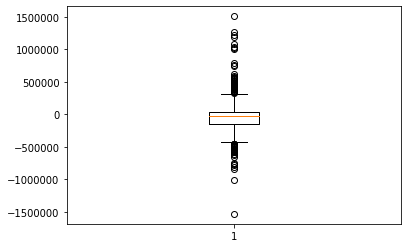

In [25]:
data4 = data2.copy()

data4['BUDGET_DEFICIT'] = data4['TOTAL_REVENUE'] - data4['TOTAL_EXPENDITURE']

plt.boxplot(data4['BUDGET_DEFICIT'])

### Answer 4

Once again, we see outliers. We go through the same process to eliminate the extreme values.

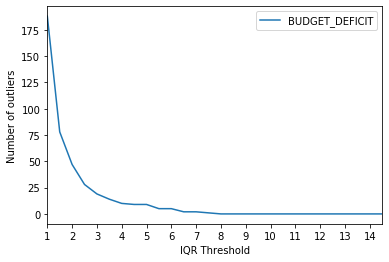

In [26]:
tukeys_visualizers(data4, ['BUDGET_DEFICIT'])

Here, `threshold` = 2 seems more appropriate. We eliminate everything outside the `threshold` = 2 cutoff...

-21484.0 384027.0 -414688.0 353366.0


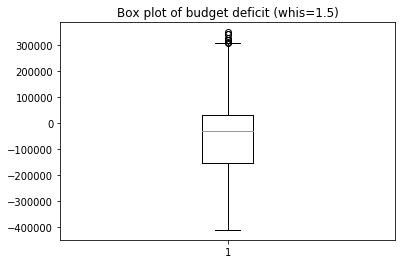

In [27]:
q75, q25 = np.percentile(data4['BUDGET_DEFICIT'], [75, 25])
iqr = q75 - q25
threshold = 2

cutoff = threshold * iqr

min_cutoff = np.median(data4['BUDGET_DEFICIT']) - cutoff
max_cutoff = np.median(data4['BUDGET_DEFICIT']) + cutoff

print(np.median(data3['BUDGET_DEFICIT']), cutoff, min_cutoff, max_cutoff)

data4 = data4.loc[data4['BUDGET_DEFICIT'] < max_cutoff]
data4 = data4.loc[data4['BUDGET_DEFICIT'] > min_cutoff]

plt.boxplot(data4['BUDGET_DEFICIT'])
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

... and winsorize at 95% percentile.

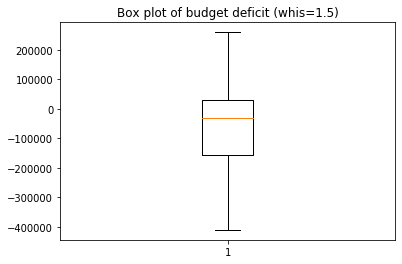

In [28]:
winsorize(data4['BUDGET_DEFICIT'], (0, 0.05), inplace= True)

plt.boxplot(data4['BUDGET_DEFICIT'])
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

## Question 5

Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [29]:
data3['BUDGET_DEFICIT'].describe()

count      1309.000000
mean     -32866.178762
std      113351.768784
min     -243250.000000
25%      -91782.000000
50%      -21484.000000
75%       24742.000000
max      149878.000000
Name: BUDGET_DEFICIT, dtype: float64

In [30]:
data4['BUDGET_DEFICIT'].describe()

count      1215.000000
mean     -40677.581893
std      145154.991848
min     -410877.000000
25%     -154959.500000
50%      -31063.000000
75%       29520.000000
max      260186.000000
Name: BUDGET_DEFICIT, dtype: float64

And the absolute difference in calculations taking data3 as the baseline is:

### Answer 5

On comparing the variables in `data3` and `data4`:

In [31]:
(data4['BUDGET_DEFICIT'].describe() - data3['BUDGET_DEFICIT'].describe())

count       -94.000000
mean      -7811.403131
std       31803.223063
min     -167627.000000
25%      -63177.500000
50%       -9579.000000
75%        4778.000000
max      110308.000000
Name: BUDGET_DEFICIT, dtype: float64

In [32]:
(data4['BUDGET_DEFICIT'].describe() - data3['BUDGET_DEFICIT'].describe())/(data3['BUDGET_DEFICIT'].describe())

count   -0.071811
mean     0.237673
std      0.280571
min      0.689114
25%      0.688343
50%      0.445867
75%      0.193113
max      0.735985
Name: BUDGET_DEFICIT, dtype: float64

The two series seem to be quite comparable. It's worth noting that even the absolute values that might seem relatively large (Eg. the difference in 25 percentile of $63,177) are actually very small in a larger economic sense. 

## Question 6

If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

### Answer 6

I think the the method in Question 3 (`data3`) is the more appropriate method as it preserves more of the raw data, whereas the `data4['BUDGET_DEFICIT']` is actually treated and winsorized twice. 